# 손글씨 예제

In [1]:
# 파일 열기
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 데이터 탐색

In [2]:
# 훈련 데이터 사이즈
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [3]:
# 테스트 데이터 사이즈
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

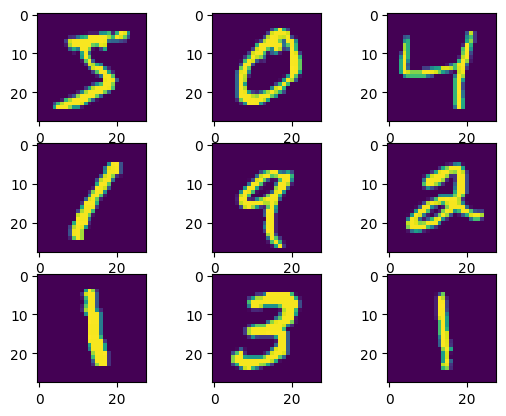

In [7]:
# 훈련 데이터 이미지 확인 (처음 9개)
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
plt.show()

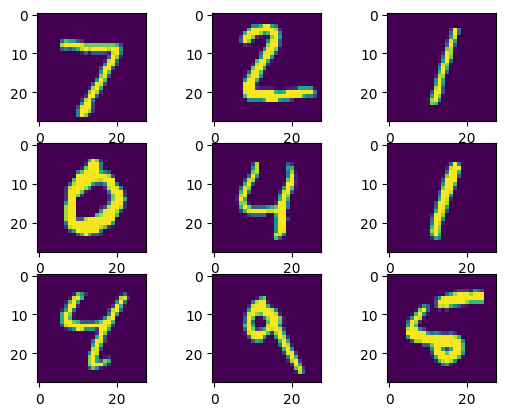

In [9]:
# 테스트 데이터 이미지 확인 (처음 9개)
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i])
plt.show()

데이터 전처리

In [10]:
# 형태변환
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [11]:
# 라벨 인코딩
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## 모델링

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-23 13:48:44.266285: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-07-23 13:48:44.266324: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-23 13:48:44.266333: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-23 13:48:44.266351: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-23 13:48:44.266366: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_facto

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       184,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,434 (794.66 KB)

 Trainable params: 203,434 (794.66 KB)

 Non-trainable params: 0 (0.00 B)

모델 구조 확인

In [13]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.3/481.3 kB 8.1 MB/s eta 0:00:00a 0:00:01


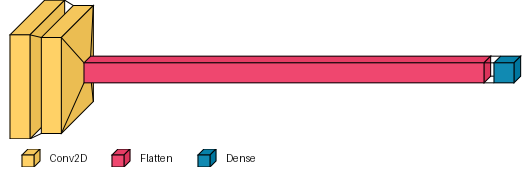

In [14]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [17]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [16]:
!pip install pydot

In [18]:
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3


2024-07-23 13:49:27.930590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.9099 - loss: 0.8947 - val_accuracy: 0.9713 - val_loss: 0.0840
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9775 - loss: 0.0750 - val_accuracy: 0.9729 - val_loss: 0.0909
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9860 - loss: 0.0455 - val_accuracy: 0.9759 - val_loss: 0.0774


In [20]:
# 모델 평가
score = model.evaluate(x_test, y_test)
print('accuracy:', score[0])
print('loss:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9724 - loss: 0.0885
accuracy: 0.07742809504270554
loss: 0.9758999943733215


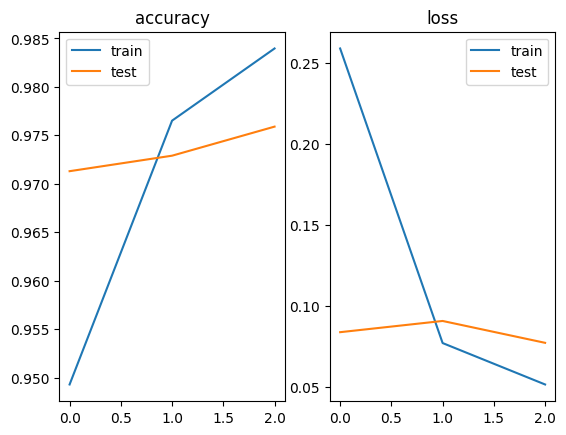

In [21]:
# 히스토리 그래프
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'])
plt.title('accuracy')
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'])
plt.title('loss')
plt.show()

In [25]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 25.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 18.0 MB/s eta 0:00:00


In [27]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.5 MB/s eta 0:00:00a 0:00:01


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


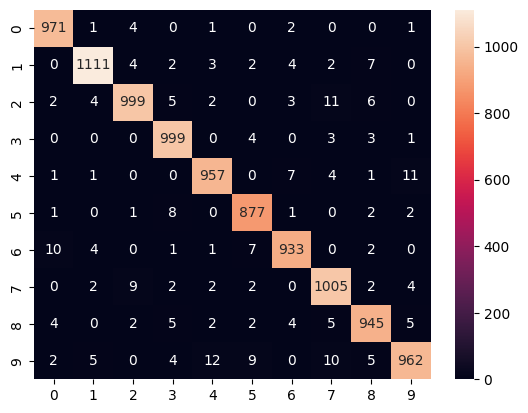

In [28]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [29]:
# 분류리포트
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.98      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.97      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
# 테스트 데이터 준비
from PIL import Image

test_data = Image.open('./three.png')
test_data = test_data.convert('L')
test_data = np.asarray(test_data)
test_data = test_data.reshape(1,28,28,1)
test_data

array([[[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
    

In [33]:
# 테스트 데이터로 예측
np.argmax(model.predict(test_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


array([3])